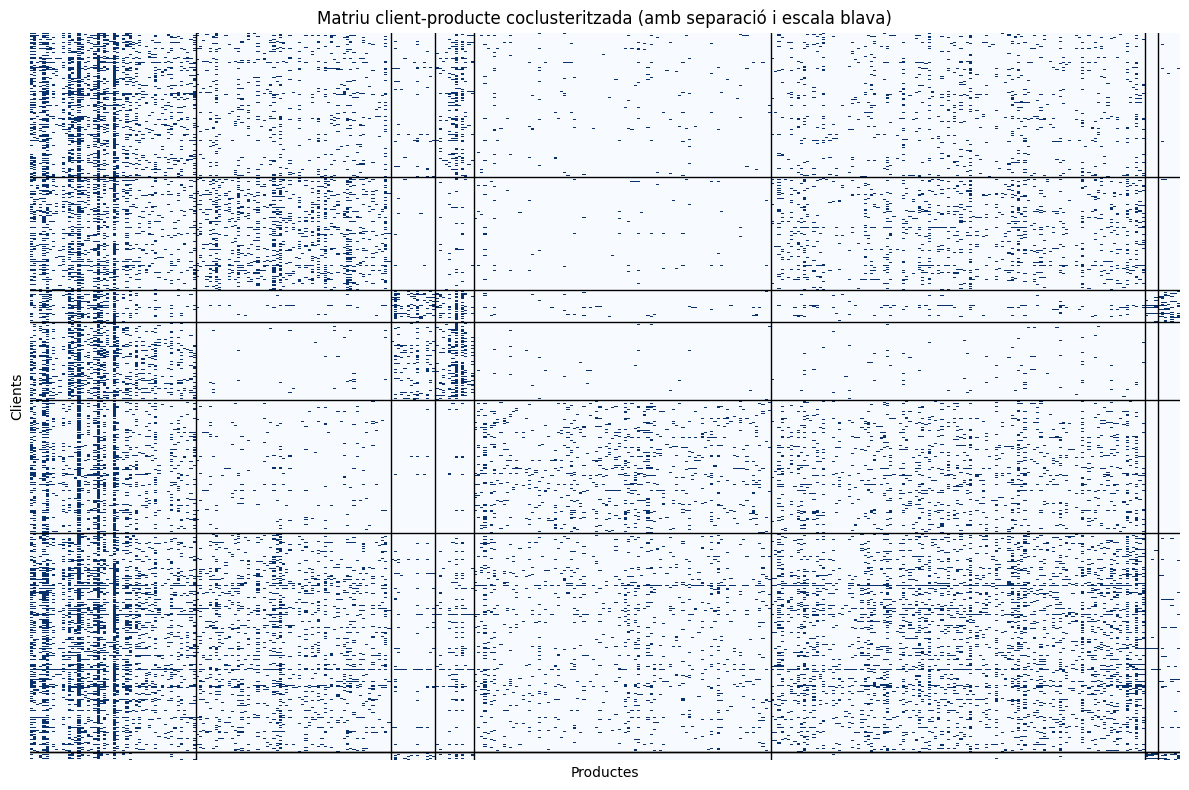

In [1]:
import pandas as pd
from sklearn.cluster import SpectralCoclustering
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Carregar dades
df = pd.read_csv("data/df_preparat.csv")

# 2. Crear matriu client × producte (binària)
client_product_matrix = pd.crosstab(df["CustomerID"], df["Product_Description"])
client_product_matrix = (client_product_matrix > 0).astype(int)

# 3. Filtrar clients i productes amb activitat mínima
min_client_purchases = 5
min_product_purchases = 10

filtered_matrix = client_product_matrix.loc[
    client_product_matrix.sum(axis=1) >= min_client_purchases,
    client_product_matrix.sum(axis=0) >= min_product_purchases
]

# 4. Aplicar coclustering
n_clusters = 8
model = SpectralCoclustering(n_clusters=n_clusters, random_state=0)
model.fit(filtered_matrix)

# 5. Afegir etiquetes de coclústers
filtered_matrix["Client_Cluster"] = model.row_labels_
product_clusters = pd.DataFrame({
    "Product_Description": filtered_matrix.columns[:-1],  # última és Client_Cluster
    "Product_Cluster": model.column_labels_
})

# 6. Exportar coclústers
filtered_matrix.reset_index().to_csv("client_coclusters.csv", index=False)
product_clusters.to_csv("product_coclusters.csv", index=False)

# 7. Reordenar matriu
reordered_matrix = filtered_matrix.drop("Client_Cluster", axis=1).iloc[
    model.row_labels_.argsort(), 
    model.column_labels_.argsort()
]

# 8. Visualització millorada: escala blava + línies de separació
row_ticks = np.cumsum(np.bincount(model.row_labels_))[:-1]
col_ticks = np.cumsum(np.bincount(model.column_labels_))[:-1]

plt.figure(figsize=(12, 8))
ax = sns.heatmap(reordered_matrix, cmap="Blues", cbar=False, xticklabels=False, yticklabels=False)

# Línies negres que separen coclústers
for r in row_ticks:
    ax.axhline(r, color='black', lw=1)
for c in col_ticks:
    ax.axvline(c, color='black', lw=1)

plt.title("Matriu client-producte coclusteritzada (amb separació i escala blava)")
plt.xlabel("Productes")
plt.ylabel("Clients")
plt.tight_layout()
plt.show()


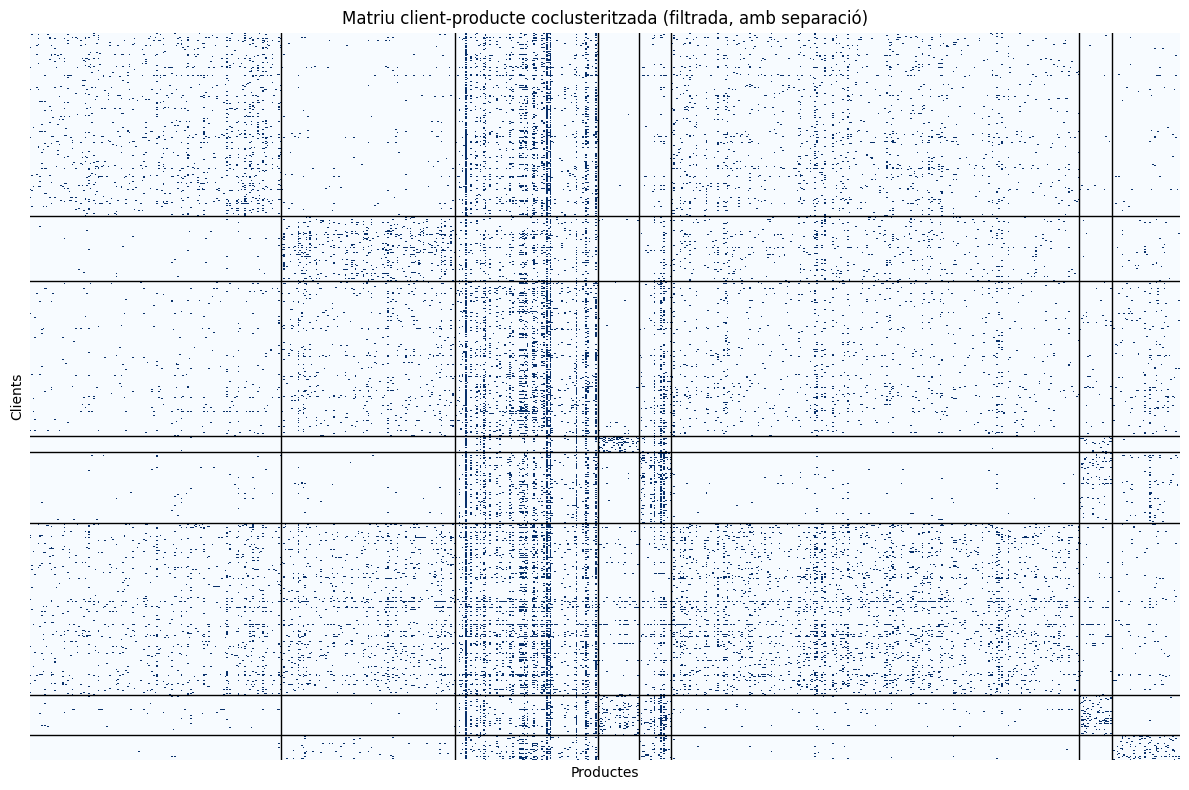

In [2]:
import pandas as pd
from sklearn.cluster import SpectralCoclustering
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Carregar dades
df = pd.read_csv("data/df_preparat.csv")

# 2. Crear matriu client × producte (binària)
client_product_matrix = pd.crosstab(df["CustomerID"], df["Product_SKU"])
client_product_matrix = (client_product_matrix > 0).astype(int)

# 3. Filtrar clients i productes amb activitat mínima
min_client_purchases = 5
min_product_purchases = 10

filtered_matrix = client_product_matrix.loc[
    client_product_matrix.sum(axis=1) >= min_client_purchases,
    client_product_matrix.sum(axis=0) >= min_product_purchases
]

# 4. Aplicar coclustering
n_clusters = 8
model = SpectralCoclustering(n_clusters=n_clusters, random_state=0)
model.fit(filtered_matrix)

# 5. Afegir etiquetes de coclústers
filtered_matrix["Client_Cluster"] = model.row_labels_
product_clusters = pd.DataFrame({
    "Product_SKU": filtered_matrix.columns[:-1],  # última és Client_Cluster
    "Product_Cluster": model.column_labels_
})

# 6. Exportar coclústers
filtered_matrix.reset_index().to_csv("client_coclusters.csv", index=False)
product_clusters.to_csv("product_coclusters.csv", index=False)

# 7. Reordenar matriu
reordered_matrix = filtered_matrix.drop("Client_Cluster", axis=1).iloc[
    model.row_labels_.argsort(), 
    model.column_labels_.argsort()
]

# 8. Visualització amb escala de blaus i línies negres de separació
row_ticks = np.cumsum(np.bincount(model.row_labels_))[:-1]
col_ticks = np.cumsum(np.bincount(model.column_labels_))[:-1]

plt.figure(figsize=(12, 8))
ax = sns.heatmap(reordered_matrix, cmap="Blues", cbar=False, xticklabels=False, yticklabels=False)

# Línies de separació entre coclústers
for r in row_ticks:
    ax.axhline(r, color='black', lw=1)
for c in col_ticks:
    ax.axvline(c, color='black', lw=1)

plt.title("Matriu client-producte coclusteritzada (filtrada, amb separació)")
plt.xlabel("Productes")
plt.ylabel("Clients")
plt.tight_layout()
plt.show()


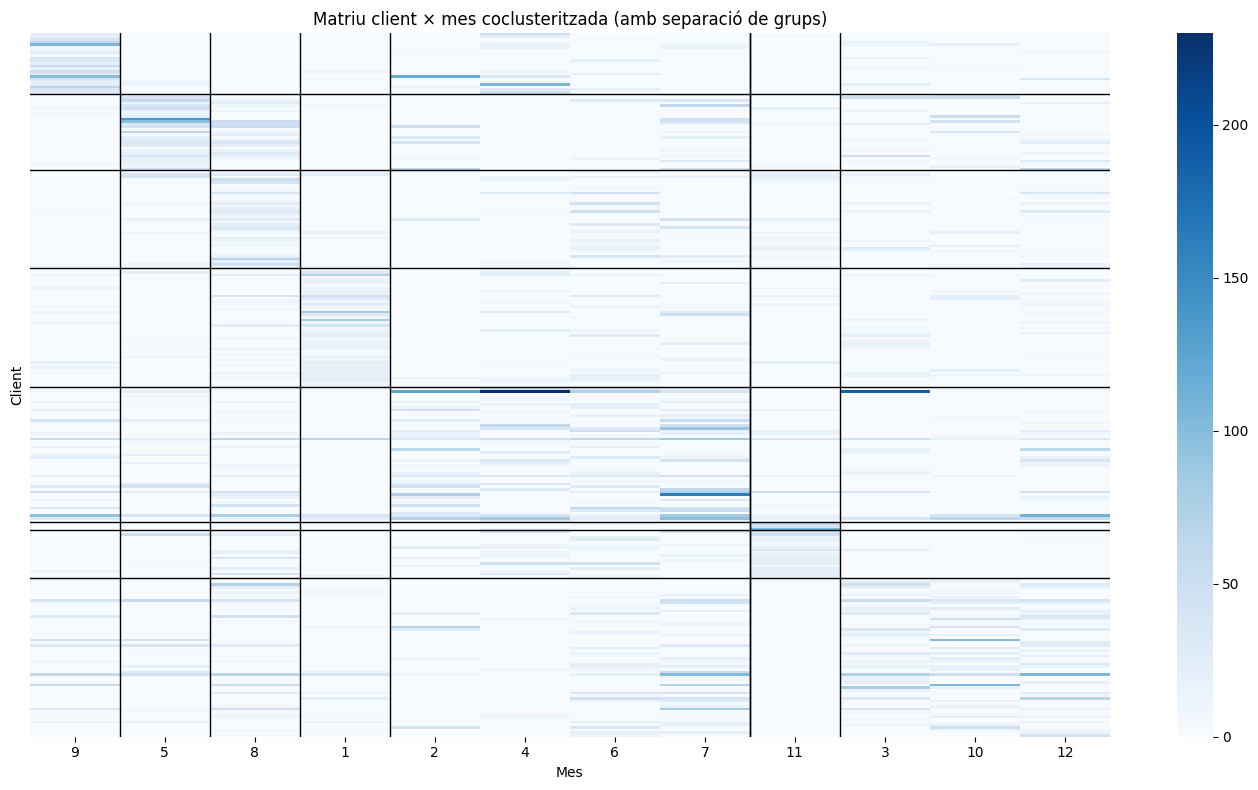

In [3]:
import pandas as pd
from sklearn.cluster import SpectralCoclustering
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Carregar les dades
df = pd.read_csv("data/df_preparat.csv")

# 2. Conversió i neteja
df["Month"] = pd.to_numeric(df["Month"], errors="coerce")
df = df.dropna(subset=["Month", "CustomerID"])

# 3. Crear matriu client × mes
client_month_matrix = pd.crosstab(df["CustomerID"], df["Month"])

# 4. Filtrar dades poc significatives
filtered_client_month = client_month_matrix.loc[
    client_month_matrix.gt(0).sum(axis=1) >= 3,
    client_month_matrix.gt(0).sum(axis=0) >= 5
]

# 5. Coclústers amb més grups
n_clusters = 8
model_cm = SpectralCoclustering(n_clusters=n_clusters, random_state=0)
model_cm.fit(filtered_client_month)

# 6. Afegim els coclústers
filtered_client_month["Client_Cluster"] = model_cm.row_labels_
month_clusters_cm = pd.DataFrame({
    "Month": filtered_client_month.columns[:-1],
    "Month_Cluster": model_cm.column_labels_
})

# 7. Exportació
filtered_client_month.reset_index().to_csv("client_month_coclusters.csv", index=False)
month_clusters_cm.to_csv("month_coclusters_client_view.csv", index=False)

# 8. Visualització millorada
# Reordenem
reordered_matrix = filtered_client_month.drop("Client_Cluster", axis=1).iloc[
    model_cm.row_labels_.argsort(),
    model_cm.column_labels_.argsort()
]

# Divisions per coclústers (línies de separació)
row_ticks = np.cumsum(np.bincount(model_cm.row_labels_))[:-1]
col_ticks = np.cumsum(np.bincount(model_cm.column_labels_))[:-1]

# Plot
plt.figure(figsize=(14, 8))
ax = sns.heatmap(reordered_matrix, cmap="Blues", cbar=True, xticklabels=True, yticklabels=False)
for r in row_ticks:
    ax.axhline(r, color='black', lw=1)
for c in col_ticks:
    ax.axvline(c, color='black', lw=1)
plt.title("Matriu client × mes coclusteritzada (amb separació de grups)")
plt.xlabel("Mes")
plt.ylabel("Client")
plt.tight_layout()
plt.show()
